# 군집화 Clustering
- 비지도학습으로, 정답 없이 특징만 가지고 보유한 데이터로 모델을 구현

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/student_kmeans.csv')
df.head()

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68


In [3]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
import seaborn as sns

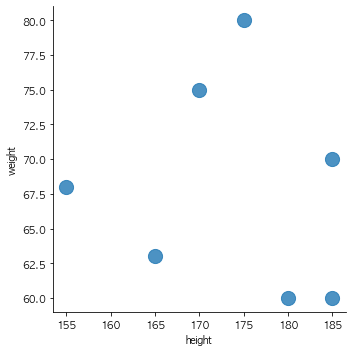

In [8]:
sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':200}
)

plt.show()

### k-Means 군집화

In [9]:
df.values

array([[185,  60],
       [180,  60],
       [185,  70],
       [165,  63],
       [155,  68],
       [170,  75],
       [175,  80]])

In [10]:
from sklearn.cluster import KMeans

data_points = df.values
kmeans = KMeans(
    n_clusters=3
).fit(data_points)

In [11]:
# 각 군집의 중심위치
kmeans.cluster_centers_

array([[172.5       ,  77.5       ],
       [183.33333333,  63.33333333],
       [160.        ,  65.5       ]])

> 위 값들을 기준으로 분류했다

In [12]:
kmeans.labels_

array([1, 1, 1, 2, 2, 0, 0], dtype=int32)

In [13]:
df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


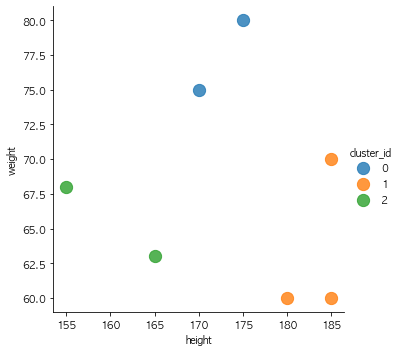

In [14]:
# 시각화
sns.lmplot(
    'height',
    'weight',
    data=df,
    fit_reg=False,
    scatter_kws={'s':150},
    hue='cluster_id'
)
plt.show()

---
### IRIS 군집화 비교

In [16]:
iris = pd.read_csv('../data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris.Name.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [18]:
# Name을 숫자로 변환하기
iris['label'] = iris['Name'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


### k-Means 군집화

In [19]:
iris2 = iris.drop(['Name', 'label'], axis=1)
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
data_points = iris2.values

kmeans = KMeans(
    n_clusters=3
).fit(data_points)

In [22]:
# 중심점 확인
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1


# 시각화 해보기
cluster_id 일련번호가 잘못 나올 수 있으므로 시각화를 통한 확인이 필요하다

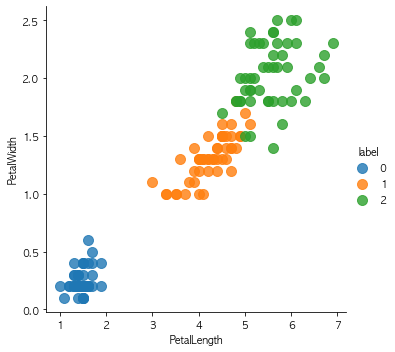

In [25]:
# 시각화
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='label'
)
plt.show()

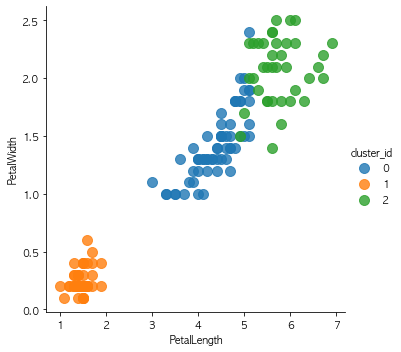

In [26]:
# 시각화
sns.lmplot(
    'PetalLength',
    'PetalWidth',
    data=iris,
    fit_reg=False,
    scatter_kws={'s':100},
    hue='cluster_id'
)
plt.show()

In [30]:
# cluster_id : 0 -> 1, 1 -> 0, 2 -> 2
iris['cluster_id2'] = iris['cluster_id'].map({0:1, 1:0, 2:2})
# 3개 전부 안 바꿔주면 실수값으로 바뀐다..

In [31]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label,cluster_id,cluster_id2
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1,0


In [32]:
sum(iris.label == iris.cluster_id2) / len(iris)

0.8933333333333333

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(iris.label, iris.cluster_id2)

0.8933333333333333

> cluster id와 label이 90프로 일치한다.